# Project Final Submission Template

### Step 1a: Planning 
#### Identify the information in the file your program will read

Describe (all) the information that is available. Be sure to note any surprising or unusual features. (For example, some information sources have missing data, which may be blank or flagged using values like -99, NaN, or something else.)

<font color="blue">
    
The cycle of the American election, which is 2016 for all polls as this was presidential polls conducted from 2016. There is a forecast date, which is November 1st 2016 for all polls as they are forecasted after all the polls close, which is close to that day. There is a state that the poll was conducted which is the location indicator in this context. The start and end dates indicate when the poll started conducting information, and when it stopped. The pollster is the source and the media/organization that conducted the poll. The branch represents the branch of government in which this election is for, which is by default President for all polls. The matchup indicates who's polling numbers will be assessed in the poll, and for all of them it is Trump, Clinton, and Johnson. The type of poll is Polls Plus for all of them which is a type that combines the economic index with the polls. The sample size indicates how many people were surveyed or participated in the poll. The raw poll numbers for each candidate indicate their polling score before making adjustments and factoring in elements of polls plus (economic index). The adjusted poll numbers are the finalized polling scores for each candidate after factoring in the elements of polls plus. The URL is the link to the source of the poll. Each poll also has a poll ID. Some columns for the adjusted and raw polls of Gary Johnson are empty (this is mainly because his polling score were a lot lower compared to Clinton and Trump). Many other ambiguous data is present. There is a grade given for each poll, a population that is labelled "lv" for each poll, a raw poll and adjusted poll number for McMullin, a candidate not considered in any of the polls (column is completely empty). There is also a column labelled "multiversions" which is complete empty. Each poll has a question ID which has ambiguous meaningness and there is a create date for each poll where in some cases, is later than the date it started conducting results which does not make sense. There is also a time stamp for each poll which apparently is the same for all polls.

</font>

### Step 1b: Planning 
#### Brainstorm ideas for what your program will produce
#### Select the idea you will build on for subsequent steps

You must brainstorm at least three ideas for graphs or charts that your program could produce and choose the one that you'd like to work on. You can choose between a line chart, histogram, bar chart, scatterplot, or pie chart.

If you would like to change your project idea from what was described in the proposal, you will need to get permission from your project TA. This is intended to help ensure that your new project idea will meet the requirements of the project. Please see the project proposal for things to be aware of when communicating with your project TA.

<font color="blue">
    
1. A bar chart with each candidate's names on the x-axis and their average polling number on the y-axis
2. A pie chart where the proportion of the total score for each candidate are represented by each sector. For example, if there are 700 polls, the total score would be 700*100 (since polls are measured by percentage). The candidates score out of 100 for all 700 polls are added up and divided by the total score which how large their sector will be on the pie chart.
3. A line chart of the candidates' polling scores overtime. Each line will represent the trend in poll numbers throughout the course of the campaign.
    
I will build on idea 1.

</font>

### Step 1c: Planning 
#### Write or draw examples of what your program will produce

You must include an image that shows what your chart or plot will look like. You can insert an image using the Insert Image command near the bottom of the Edit menu.

<font color="blue">Insert your image in this cell. Feel free to remove this prompt from this cell.</font>

### Step 2a: Building
#### Document which information you will represent in your data definitions

Before you design data definitions in the code cell below, you must explicitly document here which information in the file you chose to represent and why that information is crucial to the chart or graph that you'll produce when you complete step 2c.

<font color="blue">
    
I will be using information from the state, adj_pollclinton, adj_polltrump, and adj_polljohnson tabs. Each poll has a state of either "US" or any individual state in the United States. If the state indicates "U.S.", that means it is a nationwide poll. If the state is not "U.S.", it is an individual state so it is a statewide poll. The overall polling scores of nationwide and statewide polls are weighted evenly into the final average polling score so knowing if it is a statewide or nationwide poll is absolutely necessary. Adj_pollclinton, adj_polltrump, and adj_polljohnson are the adjusted polling scores for each candidate. All the polls are of type polls plus, which combines the polls with an economic index and adjusts accordingly to ensure more accuracy. Therefore, the polling numbers used in the calculations will be the adjusted ones as it will include more sophisticated numbers.

</font>

#### Design data definitions

In [41]:
from cs103 import *
import csv
from typing import NamedTuple, List
from enum import Enum
import matplotlib.pyplot as plt

##################
# Data Definitions

PollBoundary = Enum('PollBoundary',["statewide", "nationwide"])

#interp. a poll boundary that can be statewide (Statewide) or nationwide (Nationwide)
#examples are redundant for enumerations

@typecheck
def fn_for_poll_boundary(pb: PollBoundary)-> ...:
    #template from enumeration (2 fields)
    if pb==PollBoundary.statewide:
        return ...
    elif pb==PollBoundary.nationwide:
        return ...
    
PresidentialPoll = NamedTuple('PresidentialPoll',[('boundary', PollBoundary),
                                                  ('clinton_polling', float), #in range [0,100]
                                                  ('trump_polling',float), #in range [0,100]
                                                 ('johnson_polling',float)]) #in range [0,100]


#interp. a presidential poll from 2016 that includes the poll boundary (PollBoundary) which can be statewide or nationwide, 
#and the polling score for each candidate (clinton_polling,trump_polling,johnson_polling)

PP_0 = PresidentialPoll(PollBoundary.statewide, 44.7,44.3,2.1)
PP_1 = PresidentialPoll(PollBoundary.nationwide, 34.5,48.9,1.8)
PP_2 = PresidentialPoll(PollBoundary.statewide, 0, 89.9,3.5)
PP_3 = PresidentialPoll(PollBoundary.nationwide,76.9,0,13.4)
PP_4 = PresidentialPoll(PollBoundary.statewide,43.8,50.1,0)

@typecheck
def fn_for_presidential_poll(pp: PresidentialPoll) -> ...:
    #template from Compound (4 fields) and reference rule 
    return...(fn_for_poll_boundary(pp.boundary),pp.clinton_polling,pp.trump_polling,pp.johnson_polling)

PresidentialPollList = List[PresidentialPoll]
# interp. a list of presidential polls

LOPP0 = []
LOPP1 = [PP_0,PP_1]
LOPP2 = [PP_0,PP_2,PP_4]
LOPP3 = [PP_1,PP_3]


@typecheck
def fn_for_lopp(lopp: List[PresidentialPoll]) -> ... :
    #template from arbitrary-sized and reference rule
    #description of accumulator
    acc = ... #type:
    for pp in lopp:
        acc = ...(fn_for_presidential_poll(pp), acc)
    return...(acc)



### Step 2b and 2c: Building
#### Design a function to read the information and store it as data in your program
#### Design functions to analyze the data


Complete these steps in the code cell below. You will likely want to rename the analyze function so that the function name describes what your analysis function does.

Unless approved by your project TA, you **cannot** use libraries such as `numpy` or `pandas`. The project is meant as a way for you to demonstrate your knowledge of the learning goals in this course. While it is convinent to use external libraries, it will do all the work and will not help us gauge your mastery of the concepts.

You also cannot use built in list functions (e.g., `sum` or `average`) when writing code to do your substantial computation. Normally we encourage you to make use of what is already available but in this case, the final project involves demonstrating skills from class (e.g., how to work with a list). Using pre-built functions for this does not enable you to demonstrate what you know.

If you wish to change your project idea, you must **first** obtain permission from your TA. When contacting your TA, please provide a valid reason for why you want to change your project. Each time you change your topic idea, your TA will have to evaluate it to see if it will meet all of the project requirements. This is non-trivial task during one of the busiest times of the semester. As such, the deadline for project idea changes will be 3 business days before the deadline. Note that the deliverable deadline will not be extended and there is no compensation for the time you spent on the previous idea.

2 of 2 tests passed
2 of 2 tests passed
16 of 16 tests passed
4 of 4 tests passed
2 of 2 tests passed
4 of 4 tests passed
2 of 2 tests passed
2 of 2 tests passed
2 of 2 tests passed
3 of 3 tests passed
3 of 3 tests passed
9 of 9 tests passed


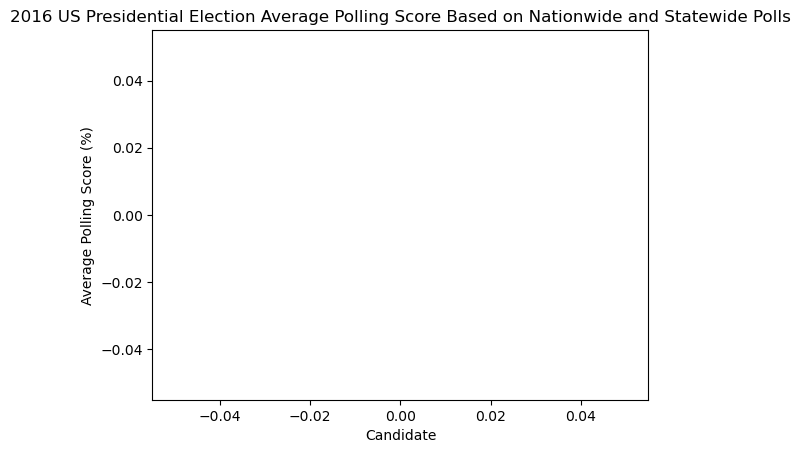

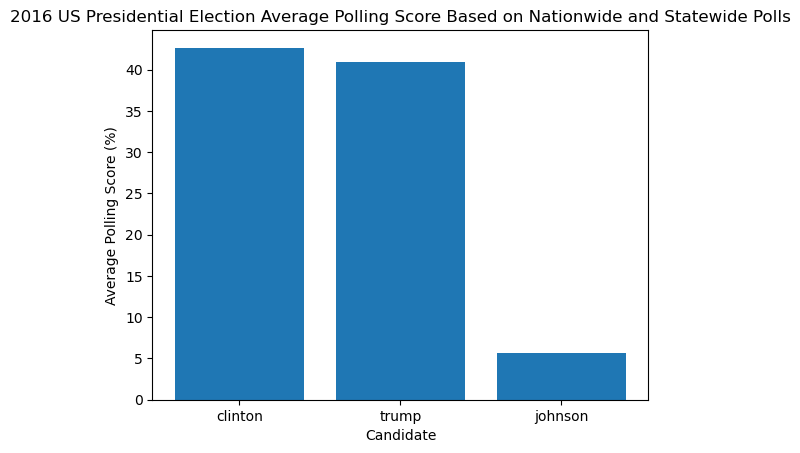

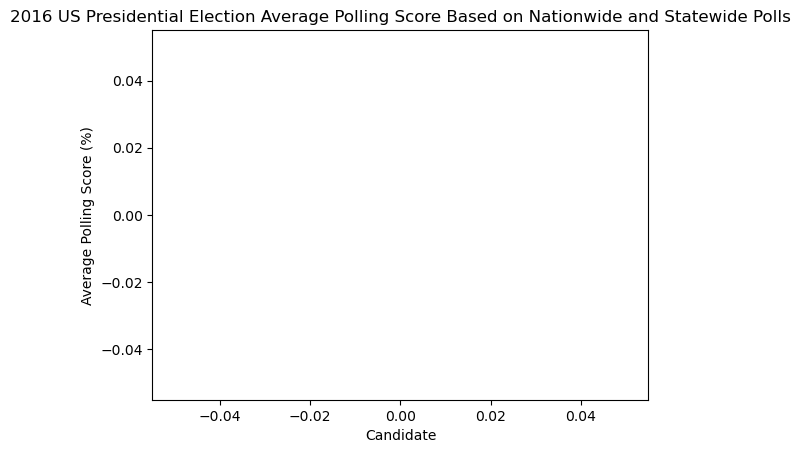

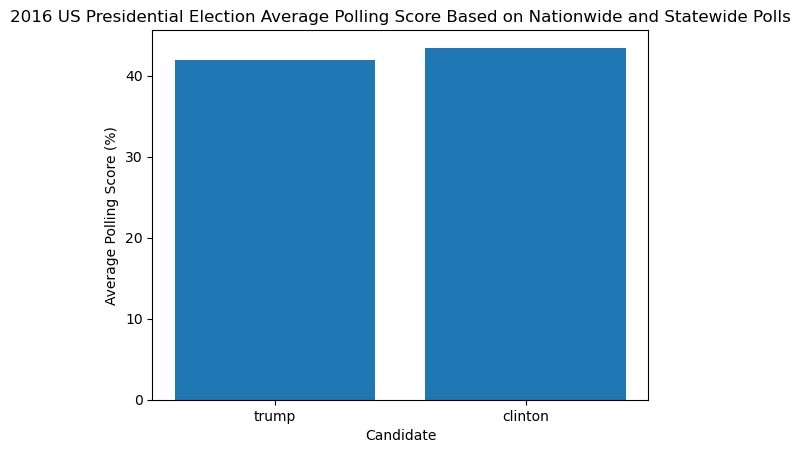

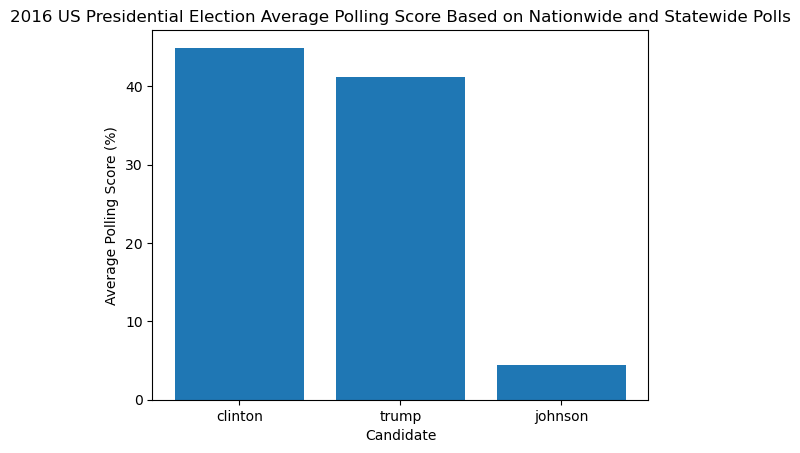

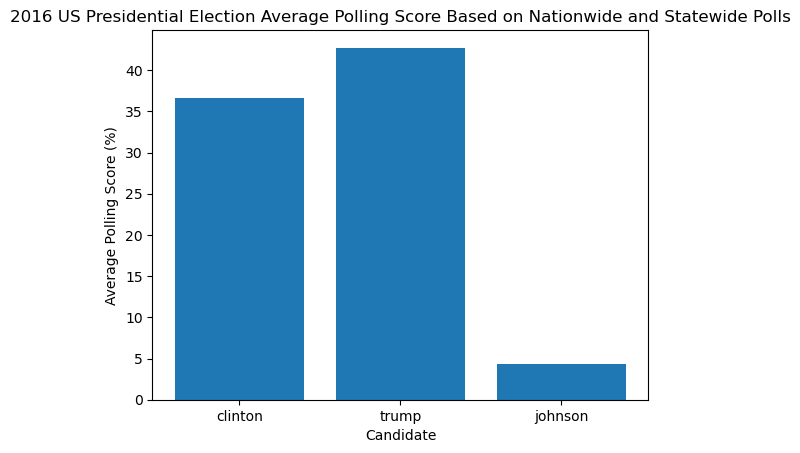

6 of 6 tests passed


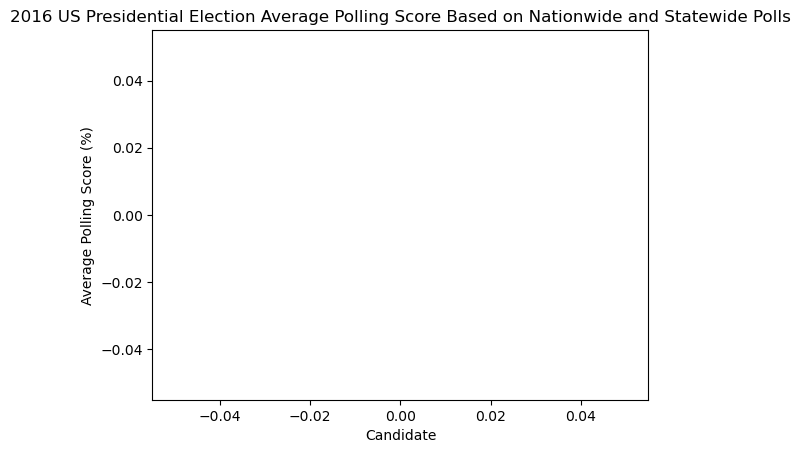

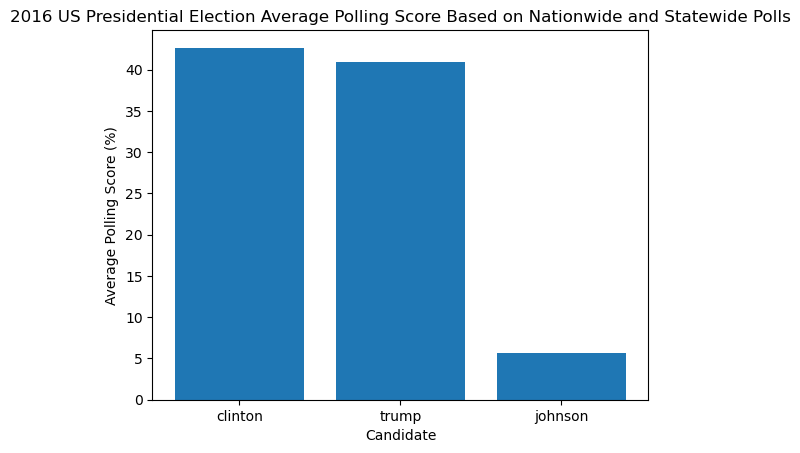

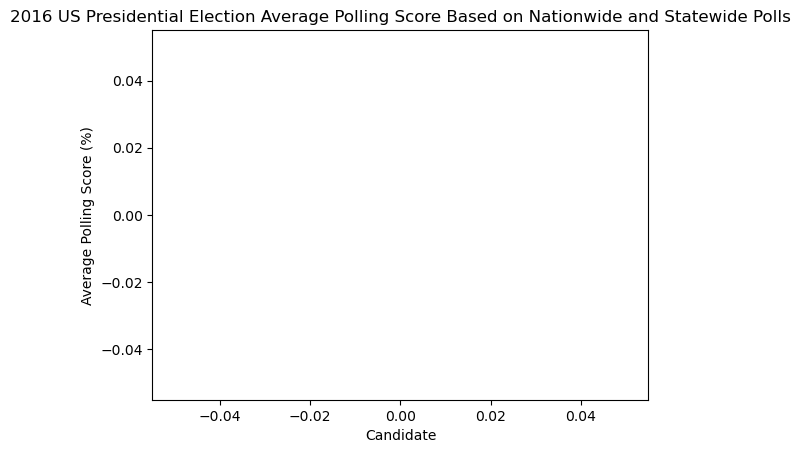

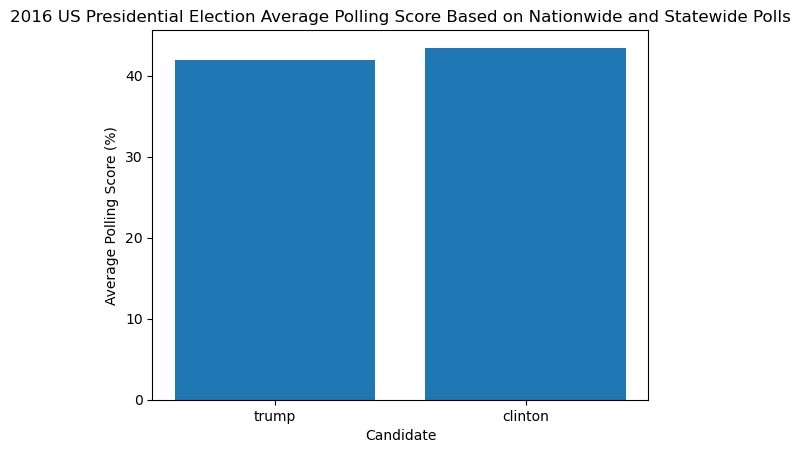

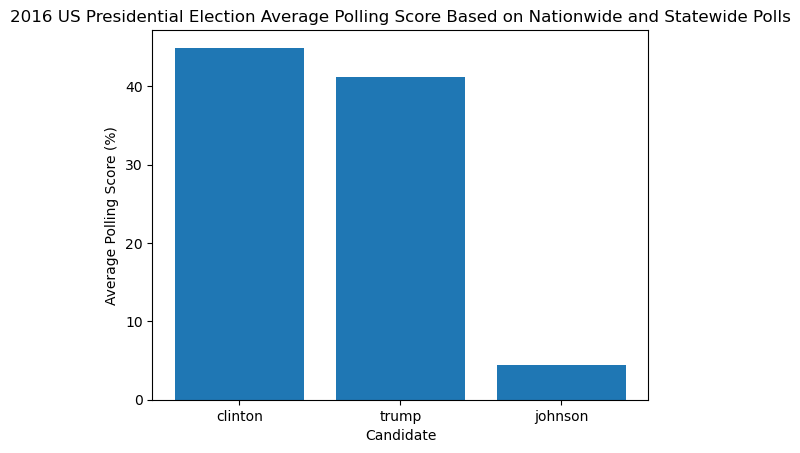

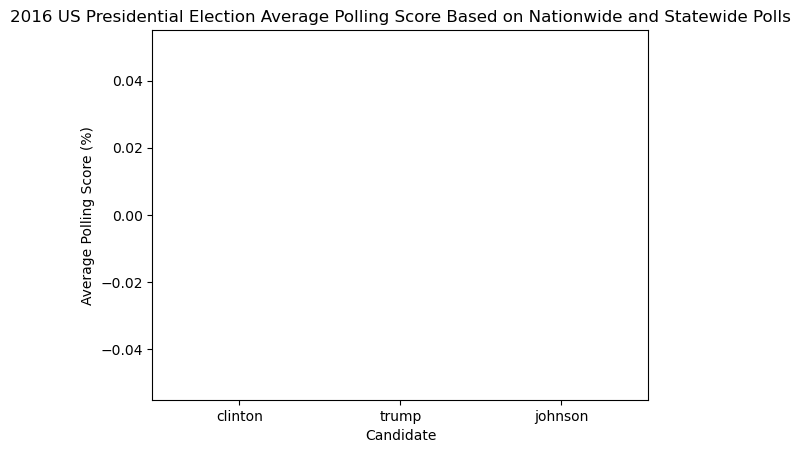

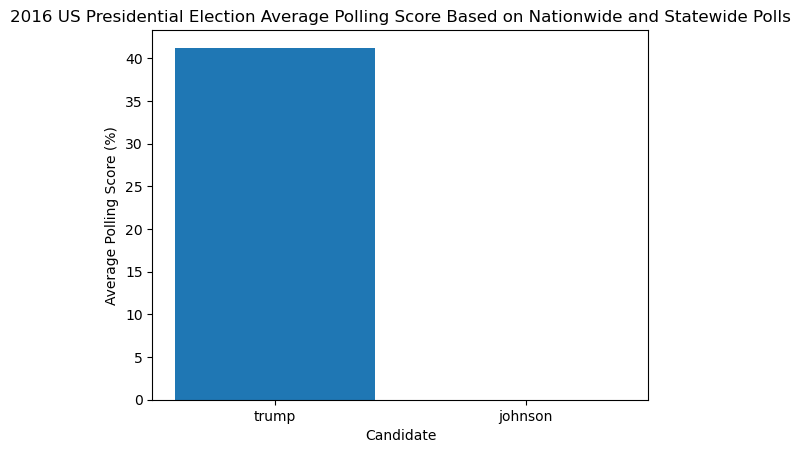

7 of 7 tests passed


In [42]:
###########
# Functions

@typecheck
def parse_poll_boundary(s: str) -> PollBoundary:
    """
    returns string s as a PollBoundary
    Assume s is the name of a US state or "U.S."
    """
    #return PollBoundary.nationwide #stub
    #template from atomic non-distinct
    #return...(s)
    if s=="U.S.":
        return PollBoundary.nationwide
    else:
        return PollBoundary.statewide

start_testing()
expect(parse_poll_boundary("U.S."), PollBoundary.nationwide)
expect(parse_poll_boundary("Pennsylvania"), PollBoundary.statewide)
summary()

@typecheck
def begins_with_digit(s: str) -> bool:
    """
    returns True if the given string (s) begins with a digit to represent the string form of a number,
    False otherwise
    """
    #return True #stub
    #template from Atomic Non-Distinct
    #return...(s)
    return (s[0]=="0") or (s[0]=="1") or (s[0]=="2") or (s[0]=="3")or (s[0]=="4") or (s[0]=="5") or (s[0]=="6") or (s[0]=="7") or (s[0]=="8") or (s[0]=="9")

start_testing()
expect(begins_with_digit("7876"), True)
expect(begins_with_digit("Hi"), False)
summary()

@typecheck
def is_reliable(row: List[str]) -> bool:
    """
    row[17],row[18],row[19] must exist (non-empty) and be the string form of a float
    row[5] must be a non-empty string that is only letters
    An empty string for row[17],row[18], or row[19] is not reliable as it does not represent meaningful data or 
    a float in string form and to assume it means 0 is too ambiguous 
    An empty string for row[5] is not reliable as it contains no letters
    
    """
    #return False #stub
    #template from atomic with indexing
    if (row[17]!=""  and row[18]!="" and row[19]!="") and (begins_with_digit(row[17])) and (begins_with_digit(row[18]))  and (begins_with_digit(row[19])) and row[5]!="":
        return (float(row[17])>=0  and float(row[17])<=100) and (float(row[18])>=0  and float(row[18])<=100) and(float(row[19])>=0  and float(row[19])<=100) and ((float(row[17]) + float(row[18])+float(row[19]))<=100)and (row[5]!="") 
    else:
        return False
    
start_testing()
expect(is_reliable(["2016","President","polls-plus","Clinton vs. Trump vs. Johnson","11/1/16","Florida","10/25/2016","10/31/2016","A","B","C","D","E","F","G","H","I","34.6","30.1","3.7","J","K","L","M","N","O","P"]), True)
expect(is_reliable(["2016","President","polls-plus","Clinton vs. Trump vs. Johnson","11/1/16","U.S.","10/25/2016","10/31/2016","A","B","C","D","E","J","G","H","I","14.7","60.8","10.6","J","K","L","M","N","O","P"]), True)
expect(is_reliable(["2016","President","polls-plus","Clinton vs. Trump vs. Johnson","11/1/16","","10/25/2016","10/31/2016","A","B","C","D","E","F","G","H","I","14.7","60.8","10.6","A","B","C","D","E","F","G"]), False)
expect(is_reliable(["2016","President","polls-plus","Clinton vs. Trump vs. Johnson","11/1/16","U.S.","10/25/2016","10/31/2016","D","i","A","B","C","D","E","F","G","H","40.3","20.9","A","B","C","D","E","F","G"]), False)
expect(is_reliable(["2016","President","polls-plus","Clinton vs. Trump vs. Johnson","11/1/16","Ohio","10/25/2016","10/31/2016","A","B","C","D","E","F","G","H","I","33.1","R","30.5","A","B","C","D","E","F","G"]), False)
expect(is_reliable(["2016","President","polls-plus","Clinton vs. Trump vs. Johnson","11/1/16","California","10/25/2016","10/31/2016","A","B","C","D","E","F","G","H","I","45.5","50.0","A","B","C","D","E","F","G","H"]), False)
expect(is_reliable(["2016","President","polls-plus","Clinton vs. Trump vs. Johnson","11/1/16","V","10/25/2016","10/31/2016","A","B","C","D","E","F","G","H","I","h","47.0","20.0","A","B","C","D","E","J","K","L"]), False)
expect(is_reliable(["2016","President","polls-plus","Clinton vs. Trump vs. Johnson","11/1/16","X","10/25/2016","10/31/2016","A","B","C","D","E","F","G","H","I","70.3","B","3.9","S","A","E","H","K","I","O"]), False)
expect(is_reliable(["2016","President","polls-plus","Clinton vs. Trump vs. Johnson","11/1/16","Indiana","10/25/2016","10/31/2016","A","B","C","D","E","F","G","H","I","L","34.5","D","R","T","Y","I","Q","W","E"]), False)
expect(is_reliable(["2016","President","polls-plus","Clinton vs. Trump vs. Johnson","11/1/16","J","10/25/2016","10/31/2016","A","B","C","D","E","F","G","H","I","J","K","L","M","N","O","P","Q","R","S","T"]), False)
expect(is_reliable(["2016","President","polls-plus","Clinton vs. Trump vs. Johnson","11/1/16","Arkansas","10/25/2016","10/31/2016","A","B","C","D","E","F","G","H","I","J","K","L","M","N","O","P","Q","R","S"]), False)
expect(is_reliable(["2016","President","polls-plus","Clinton vs. Trump vs. Johnson","11/1/16","K","10/25/2016","10/31/2016","A","B","C","D","E","F","G","H","I","33.6","J","K","L","M","N","O","P","Q","R"]), False)
expect(is_reliable(["2016","President","polls-plus","Clinton vs. Trump vs. Johnson","11/1/16","M","10/25/2016","10/31/2016","A","B","C","D","E","F","G","H","I","J","76.7","K","L","M","N","O","P","Q","R"]), False)
expect(is_reliable(["2016","President","polls-plus","Clinton vs. Trump vs. Johnson","11/1/16","N","10/25/2016","10/31/2016","A","B","C","D","E","F","G","H","I","J","","23.4","K","L","M","N","O","P","Q"]), False)
expect(is_reliable(["2016","President","polls-plus","Clinton vs. Trump vs. Johnson","11/1/16","Texas","10/25/2016","10/31/2016","A","B","C","D","E","F","G","H","I","30.5","50.3","40.5","J","K","L","M","N","O","P"]), False)
expect(is_reliable(["2016","President","polls-plus","Clinton vs. Trump vs. Johnson","11/1/16","Texas","10/25/2016","10/31/2016","A","B","C","D","E","F","G","H","I","1.5","4.3","7.5","J","K","L","M","N","O","P"]), True)
summary()

@typecheck
def read(filename: str) -> List[PresidentialPoll]:
    """    
    reads information from the specified file and returns a list of presidential polls
    
    REQUIREMENTS:
    Polling numbers must be present for each candidate in each row,
    a state name or the country name must be present,
    polling numbers are above or equal to 0, and below or equal to 100,
    AND polling numbers cannot sum to a value higher than 100
    
    All rows of data that do not meet the requirements above are eliminated
    
    """
    #return []  #stub
    # Template from HtDAP
    # lopp contains the result so far
    lopp = [] # type: List[PresidentialPoll]

    with open(filename) as csvfile:
        
        reader = csv.reader(csvfile)
        next(reader) # skip header line

        for row in reader:
            # you may not need to store all the rows, and you may need
            # to convert some of the strings to other types
            if is_reliable(row):
                pp = PresidentialPoll(parse_poll_boundary(row[5]), parse_float(row[17]), parse_float(row[18]), parse_float(row[19]))
                lopp.append(pp)
    return lopp

start_testing()
expect(read("Test 1.csv"),[])
expect(read("Test 2.csv"),[PresidentialPoll(PollBoundary.nationwide,42.6414,40.86509,5.675099)])
expect(read("Test 3.csv"),[PresidentialPoll(PollBoundary.nationwide,44.6508,42.26663,6.114222), 
                       PresidentialPoll(PollBoundary.nationwide,42.21983,41.6954,4.220173)])
expect(read("Test 4.csv"),[PresidentialPoll(PollBoundary.statewide,48.7235,37.14857,3.46675),
                      PresidentialPoll(PollBoundary.statewide,46.50486,43.77117,4.347528),
                      PresidentialPoll(PollBoundary.statewide,43.52856,40.8773,3.347528),
                      PresidentialPoll(PollBoundary.statewide,46.4776,44.02984,2.208402),
                      PresidentialPoll(PollBoundary.statewide,29.71767,48.16943,7.46675),
                      PresidentialPoll(PollBoundary.statewide,45.69044,41.73809,5.090873),
                      PresidentialPoll(PollBoundary.statewide,44.5381,43.29323,4.049983),
                      PresidentialPoll(PollBoundary.statewide,42.75185,39.2192,6.605309),
                      PresidentialPoll(PollBoundary.nationwide,47.3027,40.27811,4.22873),
                      PresidentialPoll(PollBoundary.statewide,51.70619,24.21046,7.46675),
                      PresidentialPoll(PollBoundary.statewide,45.72622,41.74498,6.001086),
                      PresidentialPoll(PollBoundary.statewide,44.51923,39.05433,6.591003),
                      PresidentialPoll(PollBoundary.statewide,29.72481,57.14391,5.46675),
                      PresidentialPoll(PollBoundary.nationwide,45.80878,41.3288,3.190963)])   
summary()



@typecheck
def is_same_boundary(pb1: PollBoundary, pb2: PollBoundary) -> bool:
    """
    returns True if pb1 is the same as pb2, False otherwise
    """
    #return False #stub
    #template from PollBoundary with additional parameter PollBoundary
    if pb1==PollBoundary.statewide:
        return pb2==PollBoundary.statewide
    elif pb1==PollBoundary.nationwide:
        return pb2==PollBoundary.nationwide

start_testing()
expect(is_same_boundary(PollBoundary.nationwide, PollBoundary.nationwide), True)
expect(is_same_boundary(PollBoundary.statewide, PollBoundary.nationwide), False)
summary()


@typecheck
def filter_for_poll_boundary(lopp: List[PresidentialPoll], poll_boundary: PollBoundary) -> List[PresidentialPoll]:
    """
    returns a list of presidential polls from lopp that are only of the given poll boundary type (poll_boundary)
    
    """
    
    #return [] #stub
    #template based on List[PresidentialPoll] with additional parameter poll_boundary
    #polls_of_boundary_type is the list of presidential polls from lopp that are of the 
    #given poll boundary type (poll_boundary) seen so far
    polls_of_boundary_type = [] #type: List[PresidentialPoll]
    
    for pp in lopp:
        if is_same_boundary(pp.boundary, poll_boundary):
            polls_of_boundary_type.append(pp)
    return polls_of_boundary_type
start_testing()
expect(filter_for_poll_boundary(LOPP0, PollBoundary.statewide), [])
expect(filter_for_poll_boundary(LOPP1, PollBoundary.nationwide), [PP_1] )
expect(filter_for_poll_boundary(LOPP2, PollBoundary.statewide), LOPP2 )
expect(filter_for_poll_boundary(LOPP2, PollBoundary.nationwide), [] )
summary()

@typecheck
def is_johnson(candidate: str) -> bool:
    """
    returns True if candidate is 'johnson', False otherwise
    """
    #return True #stub
    #template based on atomic non-distinct
    #return...(candidate)
    return candidate =='johnson'
start_testing()
expect(is_johnson('hi'), False)
expect(is_johnson('johnson'), True)
summary()

@typecheck
def is_trump(candidate: str) -> bool:
    """
    returns True if candidate is 'trump', False otherwise
    """
    #return True #stub
    #template based on atomic non-distinct
    #return...(candidate)
    return candidate =='trump'
start_testing()
expect(is_trump('hi'), False)
expect(is_trump('trump'), True)
summary()

@typecheck
def is_clinton(candidate: str) -> bool:
    """
    returns True if candidate is 'clinton', False otherwise
    """
    #return True #stub
    #template based on atomic non-distinct
    #return...(candidate)
    return candidate =='clinton'
start_testing()
expect(is_clinton('hi'), False)
expect(is_clinton('clinton'), True)
summary()

@typecheck
def filter_for_poll_scores(lopp: List[PresidentialPoll], candidate: str) -> List[float]:
    """
    returns a list of presidential poll scores from lopp that are only scores for the given candidate (candidate)
    
    """
    
    #return [] #stub
    #template based on List[PresidentialPoll] 
    #poll_scores is the list of presidential poll scores from lopp for candidate seen so far
    poll_scores = [] #type: List[float]
    
    for pp in lopp:
        # is candidate=='johnson'
        if is_johnson(candidate):
            poll_scores.append(pp.johnson_polling)
        elif is_trump(candidate):
            poll_scores.append(pp.trump_polling)
        elif is_clinton(candidate):
            poll_scores.append(pp.clinton_polling)
    return poll_scores
start_testing()
expect(filter_for_poll_scores(LOPP0, 'clinton'),[])
expect(filter_for_poll_scores(LOPP1, 'trump'),[44.3,48.9])
expect(filter_for_poll_scores(LOPP2, 'johnson'),[2.1,3.5,0])
summary()

@typecheck
def find_average_polling_score(scores: List[float]) -> float:
    """
    Calculates the average polling score based on scores,
    If the list is empty, 0 is returned
    """
    #return 0.1 #stub
    #template from List[float]
    #total is the total poll score calculated based on the number of scores seen so far
    #count is the number of poll scores seen so far
    total = 0
    count = 0
    for s in scores:
        count = count + 1
        total = total + s
       
    if count == 0:
        return 0
    
    return total/count

start_testing()
expect(find_average_polling_score([1,2,3]), 2)
expect(find_average_polling_score([44.3,48.9]), (44.3+48.9)/2)
expect(find_average_polling_score([]),0)
summary()

@typecheck 
def weighted_average(value1 : float, value2: float) -> float:
    """
    returns the average of value1 and value2
    """
    #return 1.2 #stub
    #template based on atomic non-distinct
    #return...(value1, value2)
    return (0.5*value1 + 0.5*value2)

    
@typecheck
def count_scores_for_labels(labels: List[str], lopp: List[PresidentialPoll]) -> List[float]:
    """
    Determines the average polling score for each candidate (weighted evenly between nationwide and statewide polls) 
    in lopp specified by each value of labels
    
    If labels is an empty list, an empty list is returned
    If lopp is empty but labels is not, then a list of zeroes is returned which corresponds well to the fact 
    that no average polling score would be shown if there is no data
    """
    
    #return [] #stub
    #template based on List[str]
    #average_polling_scores stores the average polling scores calculated for each candidate based on the values inside the labels seen so far
    average_polling_scores = [] #type: List[float]
    
    for l in labels:
        filtered_statewide_lopp = filter_for_poll_boundary(lopp, PollBoundary.statewide)
        filtered_statewide_scores_lopp = filter_for_poll_scores(filtered_statewide_lopp, l) 
        filtered_nationwide_lopp = filter_for_poll_boundary(lopp, PollBoundary.nationwide) 
        filtered_nationwide_scores_lopp = filter_for_poll_scores(filtered_nationwide_lopp, l)
        average_nationwide_polling_score = find_average_polling_score(filtered_nationwide_scores_lopp)
        average_statewide_polling_score = find_average_polling_score(filtered_statewide_scores_lopp)
        if filtered_statewide_lopp == []:
            average_polling_score = average_nationwide_polling_score
        elif filtered_nationwide_lopp == []:
            average_polling_score = average_statewide_polling_score
        else:
             average_polling_score = weighted_average(average_nationwide_polling_score, average_statewide_polling_score)
        
        average_polling_scores.append(average_polling_score)
            
            
#         if (len(filtered_nationwide_scores_lopp) == 0) and (len(filtered_statewide_scores_lopp) == 0):
#             average_polling_scores.append(0)
#         elif (len(filtered_nationwide_scores_lopp) == 0):
#             average_statewide_polling_score = sum(filtered_statewide_scores_lopp)/len(filtered_statewide_scores_lopp)
#             average_polling_scores.append(average_statewide_polling_score)
#         elif (len(filtered_statewide_scores_lopp) == 0):
#             average_nationwide_polling_score = sum(filtered_nationwide_scores_lopp)/len(filtered_nationwide_scores_lopp)
#             average_polling_scores.append(average_nationwide_polling_score)
#         else:
#             average_statewide_polling_score = sum(filtered_statewide_scores_lopp)/len(filtered_statewide_scores_lopp)
#             average_nationwide_polling_score = sum(filtered_nationwide_scores_lopp)/len(filtered_nationwide_scores_lopp)
#             average_polling_scores.append(0.5*average_statewide_polling_score + 0.5*average_nationwide_polling_score)
            
            
    return average_polling_scores

start_testing()
expect(count_scores_for_labels(['clinton', 'trump', 'johnson'], LOPP2),[(44.7+0+43.8)/3,(44.3+89.9+50.1)/3,(2.1+3.5+0)/3])
expect(count_scores_for_labels([], LOPP1), [])
expect(count_scores_for_labels([], LOPP0), [])
expect(count_scores_for_labels(['clinton', 'trump', 'johnson'], LOPP0), [0,0,0])
expect(count_scores_for_labels(['trump', 'johnson', 'clinton'], LOPP1), [(0.5*48.9 + 0.5*44.3), (2.1*0.5 + 1.8*0.5), (0.5*44.7 + 0.5*34.5)])
expect(count_scores_for_labels(['johnson', 'clinton', 'trump'], [PP_0, PP_1, PP_2]), [(0.5*((2.1+3.5)/2) + 0.5*1.8), (0.5*((44.7+0)/2) + 0.5*34.5), (0.5*((44.3+89.9)/2) + 0.5*48.9)])
expect(count_scores_for_labels(['johnson', 'clinton', 'trump'], [PP_0, PP_1, PP_2, PP_3,PP_4]), [(0.5*((2.1+3.5+0)/3) + 0.5*((1.8+13.4)/2)), (0.5*((44.7+43.8+0)/3) + 0.5*((34.5+76.9)/2)), (0.5*((44.3+89.9+50.1)/3)) + (0.5*(48.9+0)/2)])
expect(count_scores_for_labels(['johnson'], [PP_0, PP_1, PP_2, PP_3,PP_4]), [(0.5*((2.1+3.5+0)/3) + 0.5*((1.8+13.4)/2))])
expect(count_scores_for_labels(['clinton'], [PP_2]), [0])
summary()

@typecheck
def plot_chart(lopp: List[PresidentialPoll], candidate_names: List[str]) -> None: 
    """ 
    Plots the average polling score of each Presidential Candidate indicated (Trump, Clinton, Johnson) as a bar chart
    Each candidate's score has its own bar
    If lopp does not contain any Presidential Polls, then nothing will appear on the bar chart
    """ 

    #return None #stub
    
    #template based on visualization
    
    scores = count_scores_for_labels(candidate_names, lopp)
    rects1 = plt.bar(candidate_names,scores)
    
    plt.xlabel('Candidate')
    plt.ylabel('Average Polling Score (%)')
    plt.title('2016 US Presidential Election Average Polling Score Based on Nationwide and Statewide Polls')
    plt.show()
    
    return 

start_testing()

#expect a bar chart with the x-axis labelled 'Candidate', the y-axis labeled 'Average Polling Score (%)'
# and a title of '2016 US Presidential Election Average Polling Score Based on Nationwide and Statewide Polls'
expect(plot_chart([], []), None)

#expect a bar chart with the x-axis labelled 'Candidate', the y-axis labeled 'Average Polling Score (%)'
# and a title of '2016 US Presidential Election Average Polling Score Based on Nationwide and Statewide Polls'
#there should be 3 bars. One labelled 'clinton', with a height of 42.64, one labelled 'trump' with a height 
#of 40.87, and one labelled 'johnson' with a height of 5.68
expect(plot_chart([PresidentialPoll(PollBoundary.nationwide,42.6414,40.86509,5.675099)], ['clinton', 'trump', 'johnson']), None)

expect(plot_chart([PresidentialPoll(PollBoundary.nationwide,42.6414,40.86509,5.675099)], []), None)

#expect a bar chart with the x-axis labelled 'Candidate', the y-axis labeled 'Average Polling Score (%)'
# and a title of '2016 US Presidential Election Average Polling Score Based on Nationwide and Statewide Polls'
#there should be 3 bars. One labelled 'clinton', with a height of 43.44 and one labelled 'trump' with a height 
#of 41.98
expect(plot_chart([PresidentialPoll(PollBoundary.nationwide,44.6508,42.26663,6.114222), 
                       PresidentialPoll(PollBoundary.nationwide,42.21983,41.6954,4.220173)], ['trump', 'clinton']), None)

#expect a bar chart with the x-axis labelled 'Candidate', the y-axis labeled 'Average Polling Score (%)'
# and a title of '2016 US Presidential Election Average Polling Score Based on Nationwide and Statewide Polls'
#there should be 3 bars. One labelled 'clinton', with a height of 44.93, one labelled 'trump' with a height 
#of 41.25, and one labelled 'johnson' with a height of 4.4428
expect(plot_chart([PresidentialPoll(PollBoundary.statewide,48.7235,37.14857,3.46675),
                      PresidentialPoll(PollBoundary.statewide,46.50486,43.77117,4.347528),
                      PresidentialPoll(PollBoundary.statewide,43.52856,40.8773,3.347528),
                      PresidentialPoll(PollBoundary.statewide,46.4776,44.02984,2.208402),
                      PresidentialPoll(PollBoundary.statewide,29.71767,48.16943,7.46675),
                      PresidentialPoll(PollBoundary.statewide,45.69044,41.73809,5.090873),
                      PresidentialPoll(PollBoundary.statewide,44.5381,43.29323,4.049983),
                      PresidentialPoll(PollBoundary.statewide,42.75185,39.2192,6.605309),
                      PresidentialPoll(PollBoundary.nationwide,47.3027,40.27811,4.22873),
                      PresidentialPoll(PollBoundary.statewide,51.70619,24.21046,7.46675),
                      PresidentialPoll(PollBoundary.statewide,45.72622,41.74498,6.001086),
                      PresidentialPoll(PollBoundary.statewide,44.51923,39.05433,6.591003),
                      PresidentialPoll(PollBoundary.statewide,29.72481,57.14391,5.46675),
                      PresidentialPoll(PollBoundary.nationwide,45.80878,41.3288,3.190963)]
                  , ['clinton', 'trump', 'johnson']), None)

#expect a bar chart with the x-axis labelled 'Candidate', the y-axis labeled 'Average Polling Score (%)'
# and a title of '2016 US Presidential Election Average Polling Score Based on Nationwide and Statewide Polls'
#There be no bars (height is 0) and a single mark over the x-axis
expect(plot_chart([PresidentialPoll(PollBoundary.statewide,0,37.14857,3.46675),
                      PresidentialPoll(PollBoundary.statewide,46.50486,43.77117,4.347528),
                      PresidentialPoll(PollBoundary.statewide,43.52856,40.8773,3.347528),
                      PresidentialPoll(PollBoundary.statewide,46.4776,44.02984,2.208402),
                      PresidentialPoll(PollBoundary.statewide,29.71767,48.16943,7.46675),
                      PresidentialPoll(PollBoundary.statewide,45.69044,41.73809,5.090873),
                      PresidentialPoll(PollBoundary.statewide,44.5381,43.29323,4.049983)]
                   , ['clinton', 'trump', 'johnson']), None)

#expect a bar chart with the x-axis labelled 'Candidate', the y-axis labeled 'Average Polling Score (%)'
# and a title of '2016 US Presidential Election Average Polling Score Based on Nationwide and Statewide Polls'
#There be only 1 bar labelled 'trump' with a height of 41.25 and a bar labelled 'johnson' with a height of 0
# expect(plot_chart("Test 6.csv", ['trump', 'johnson']), None)

summary()


@typecheck
def main(filename: str, candidate_names: List[str]) -> None:
    """
    Reads the file from given filename, analyzes the data,
    returns the result
    """
    #return None #stub
    # Template from HtDAP, based on composition
    return plot_chart(read(filename), candidate_names)

start_testing()

#expect a bar chart with the x-axis labelled 'Candidate', the y-axis labeled 'Average Polling Score (%)'
# and a title of '2016 US Presidential Election Average Polling Score Based on Nationwide and Statewide Polls'
expect(main("Test 1.csv", []), None)

#expect a bar chart with the x-axis labelled 'Candidate', the y-axis labeled 'Average Polling Score (%)'
# and a title of '2016 US Presidential Election Average Polling Score Based on Nationwide and Statewide Polls'
#there should be 3 bars. One labelled 'clinton', with a height of 42.64, one labelled 'trump' with a height 
#of 40.87, and one labelled 'johnson' with a height of 5.68
expect(main("Test 2.csv", ['clinton', 'trump', 'johnson']), None)

expect(main("Test 2.csv", []), None)

#expect a bar chart with the x-axis labelled 'Candidate', the y-axis labeled 'Average Polling Score (%)'
# and a title of '2016 US Presidential Election Average Polling Score Based on Nationwide and Statewide Polls'
#there should be 3 bars. One labelled 'clinton', with a height of 43.44 and one labelled 'trump' with a height 
#of 41.98
expect(main("Test 3.csv", ['trump', 'clinton']), None)

#expect a bar chart with the x-axis labelled 'Candidate', the y-axis labeled 'Average Polling Score (%)'
# and a title of '2016 US Presidential Election Average Polling Score Based on Nationwide and Statewide Polls'
#there should be 3 bars. One labelled 'clinton', with a height of 44.93, one labelled 'trump' with a height 
#of 41.25, and one labelled 'johnson' with a height of 4.4428
expect(main("Test 4.csv", ['clinton', 'trump', 'johnson']), None)

#expect a bar chart with the x-axis labelled 'Candidate', the y-axis labeled 'Average Polling Score (%)'
# and a title of '2016 US Presidential Election Average Polling Score Based on Nationwide and Statewide Polls'
#There be no bars (height is 0) and a single mark over the x-axis
expect(main("Test 5.csv", ['clinton', 'trump', 'johnson']), None)

#expect a bar chart with the x-axis labelled 'Candidate', the y-axis labeled 'Average Polling Score (%)'
# and a title of '2016 US Presidential Election Average Polling Score Based on Nationwide and Statewide Polls'
#There be only 1 bar labelled 'trump' with a height of 41.25 and a bar labelled 'johnson' with a height of 0
expect(main("Test 6.csv", ['trump', 'johnson']), None)

summary()








### Final Graph/Chart

Now that everything is working, you **must** call `main` on the intended information source in order to display the final graph/chart:

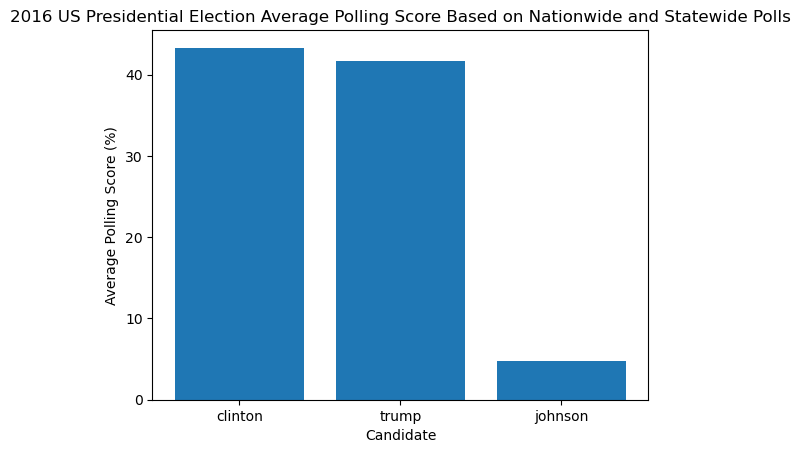

In [43]:
main("presidential_polls.csv", ['clinton', 'trump', 'johnson'])

In [44]:
# Be sure to select ALL THE FILES YOU NEED (including csv's) 
# when you submit. As usual, you cannot edit this cell.
# Instead, run this cell to start the submission process.
from cs103 import submit

COURSE = 123409
ASSIGNMENT = 1615244 # Final submission

submit(COURSE, ASSIGNMENT)

# If your submission fails, SUBMIT by downloading your files and uploading them 
# to Canvas. You can learn how on the page "How to submit your Jupyter notebook" 
# on our Canvas site.

Valid(value=True, description='Token')

SelectMultiple(description='Files', index=(0,), layout=Layout(height='100%', width='50%'), options=('project_f…

Button(description='submit', icon='check', style=ButtonStyle(), tooltip='submit')

# Please double check your submission on Canvas to ensure that the right files (Jupyter file + CSVs) have been submitted and that the files do not contain unexpected errors.

<font color="red">**You should always check your submission on Canvas. It is your responsibility to ensure that the correct file has been submitted for grading.**</font> Regrade or accomodation requests using reasoning such as "I didn't realize I submitted the wrong file"/"I didn't realize the submission didn't work"/"I didn't realize I didn't save before submitting so some of my work is missing" will not be considered.